<H1 > Welcome to Data Science Fundamentals: Pandas to Predictions</H1>

<p align="center">
  <img src="Datafain logo.jpg"/>
</p>

Hello. My name is [Ridwan Salahuddeen](https://www.linkedin.com/in/ridwan-salahuddeen/) and I shall be taking you through on this class.

Follow [DataFain](https://www.linkedin.com/company/data-for-all-initiative) on LinkedIn

## Table of Contents
<font >
<ol>
<li> Ice Breaker: What is Data Science?, Data Science Tools, Numpy Introduction, Quiz 1
<li> Importance of Numpy,More Hands-on Use of Numpy,Quiz 2,Assignment 1
<li> Introduction to Pandas: Creating Dataframes and Reading From Files,Quiz 3
<li> More on Pandas: Manipulating Dataframes,Quiz 4,Assignment 2
<li> Introduction to Matplotlib: Plotting Simple Charts,Quiz 5
    
<li> More on Matplotlib: Drawing Inference from plots,Quiz 6,Assignment 3
<li> Types of Machine Learning Algorithms,Quiz 7
<li> Understanding Learning Algorithms - Logistic Regression,Quiz 8,Assignment 4
<li> Using Sci-Kit Learn: Logistic Regression,Sample Classification Problem1,Quiz 9
<li> Sample Classification Problem 2,Quiz 10,Assignment 5
</ol>
</font>

# Logistic Regression

**Demographic:**

• Sex: male or female(Nominal)

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

Behavioral

• Current Smoker: whether or not the patient is a current smoker (Nominal)

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Medical( history)**

• BP Meds: whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)

**Medical(current)**

• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous)

**Predict variable (desired target)**

• 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score

In [3]:
data = pd.read_csv('framingham.csv')
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [6]:
data.tail(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4228,0,50,1.0,0,0.0,0.0,0,1,1,260.0,190.0,130.0,43.67,85.0,260.0,0
4229,0,51,3.0,1,20.0,0.0,0,1,0,251.0,140.0,80.0,25.60,75.0,NaN,0
4230,0,56,1.0,1,3.0,0.0,0,1,0,268.0,170.0,102.0,22.89,57.0,NaN,0
4231,1,58,3.0,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
4232,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0


In [9]:
# Inspect the dataset for nans

data.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [11]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
male,4238.0,0.429212,0.495022,0.00,0.00,0.0,1.000,1.0
age,4238.0,49.584946,8.572160,32.00,42.00,49.0,56.000,70.0
education,4133.0,1.978950,1.019791,1.00,1.00,2.0,3.000,4.0
currentSmoker,4238.0,0.494101,0.500024,0.00,0.00,0.0,1.000,1.0
cigsPerDay,4209.0,9.003089,11.920094,0.00,0.00,0.0,20.000,70.0
BPMeds,4185.0,0.029630,0.169584,0.00,0.00,0.0,0.000,1.0
prevalentStroke,4238.0,0.005899,0.076587,0.00,0.00,0.0,0.000,1.0
prevalentHyp,4238.0,0.310524,0.462763,0.00,0.00,0.0,1.000,1.0
diabetes,4238.0,0.025720,0.158316,0.00,0.00,0.0,0.000,1.0
totChol,4188.0,236.721585,44.590334,107.00,206.00,234.0,263.000,696.0


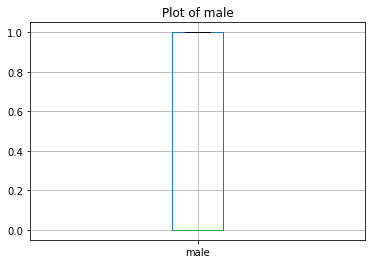

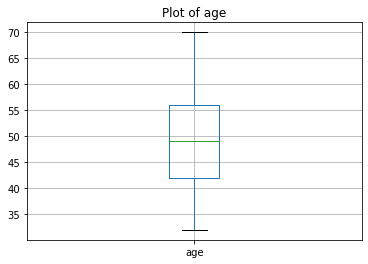

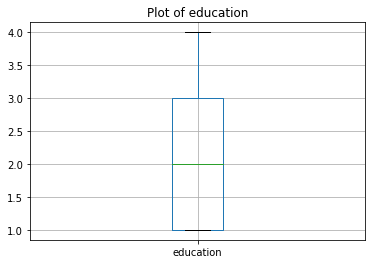

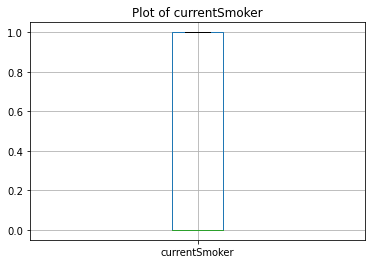

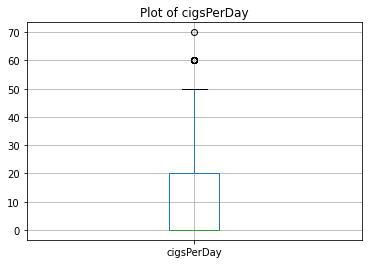

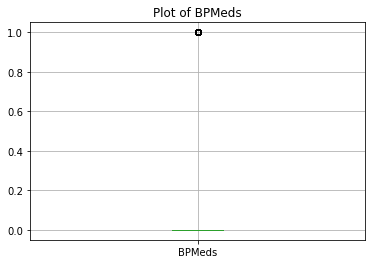

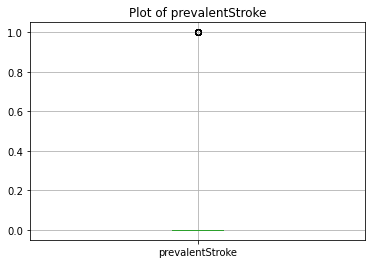

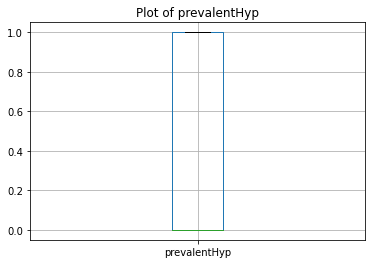

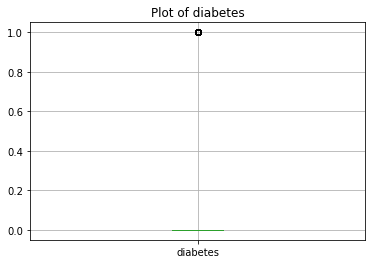

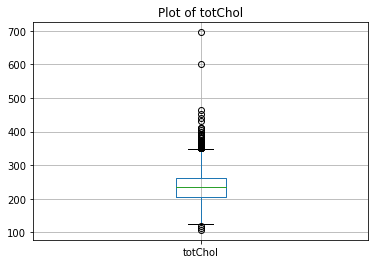

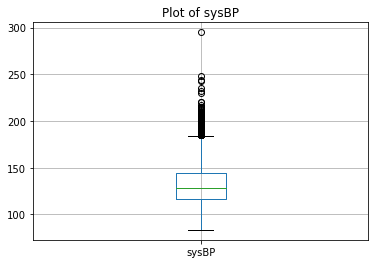

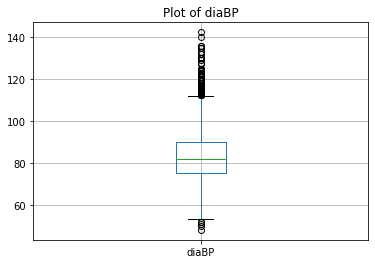

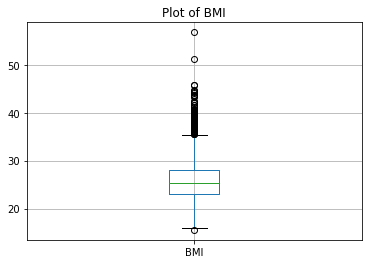

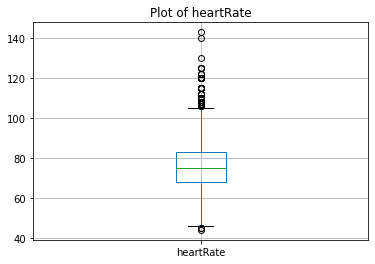

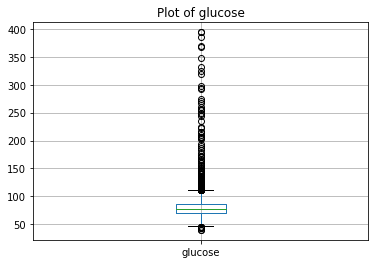

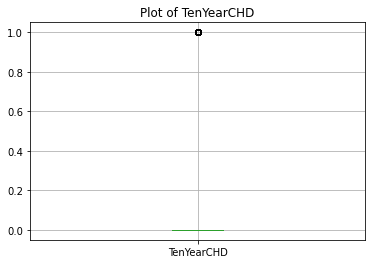

In [12]:
for col in data:
    data[[col]].boxplot()
    plt.title("Plot of %s" %col)
    plt.show()

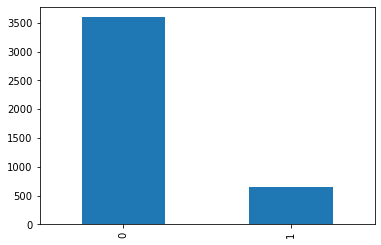

In [21]:
values = data['TenYearCHD'].value_counts()
values.plot(kind = 'bar')

In [22]:
for col in data:
    data[col] = data[col].ffill().bfill()

In [23]:
data.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [25]:
train, test = train_test_split(data, test_size =0.25)

In [26]:
train.shape, test.shape

((3178, 16), (1060, 16))

In [27]:
train_x = train.drop('TenYearCHD', axis = 1)
train_y = train['TenYearCHD']

test_x = test.drop('TenYearCHD', axis = 1)
test_y = test['TenYearCHD']

In [36]:
model = LogisticRegression(solver = 'newton-cg')

model.fit(train_x, train_y)

LogisticRegression(solver='newton-cg')

In [40]:
pred = model.predict(test_x)
accuracy_score(pred, test_y)

0.8452830188679246

In [41]:
recall_score(pred, test_y)

0.7142857142857143

In [44]:
precision_score(pred, test_y)

0.08670520231213873

In [45]:
f1_score(pred, test_y)

0.15463917525773194

In [46]:
confusion_matrix(pred, test_y)

array([[881, 158],
       [  6,  15]], dtype=int64)

In [47]:
15/(15+158)

0.08670520231213873

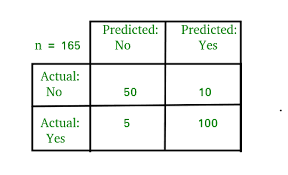